# SP500 Analysis using R
Ching-Cheng Hsu  <br>
chingchenghsu.physics@googlemail.com

In [110]:
my_data_orig = scan("SP500.csv")

In [111]:
length(my_data)

[1] 1801

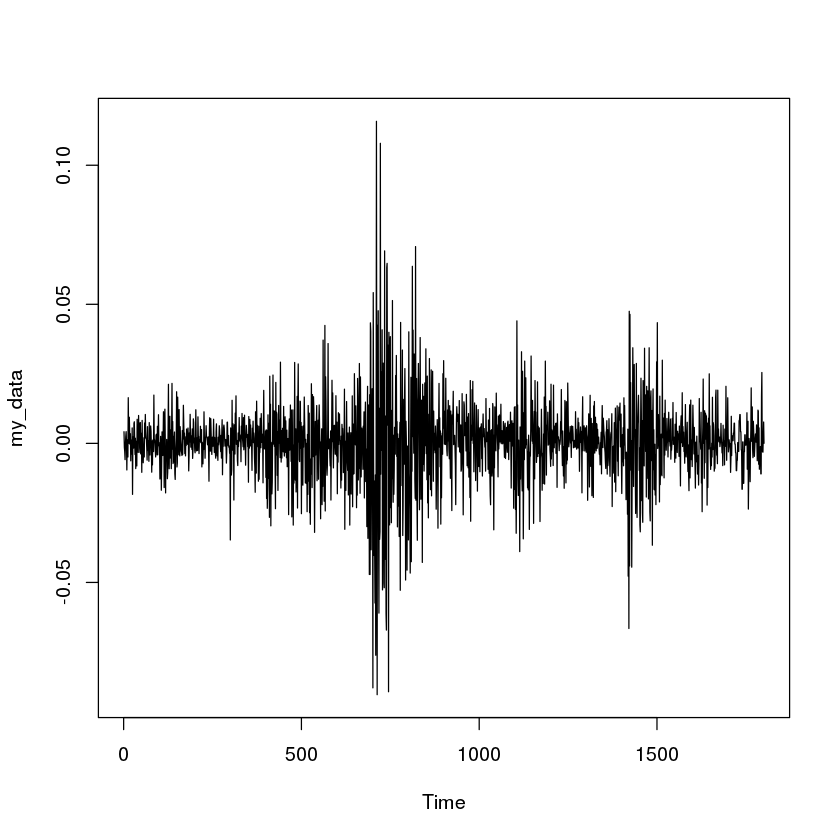

In [112]:
my_data=ts(my_data_orig[2000:3800])
plot(my_data)

Careful here, I only choose part of the data here for fitting. I realized that the SP index plot may have seasonal effect. Hence I have excluded delibrately a portion of the SP500 where we had excessive volatility clustering. This impacts the serial correlation of the  series and hence has the effect of making the series seem "more stationary" than it has been in the past.

In [113]:
length(diff(my_data))

[1] 1800

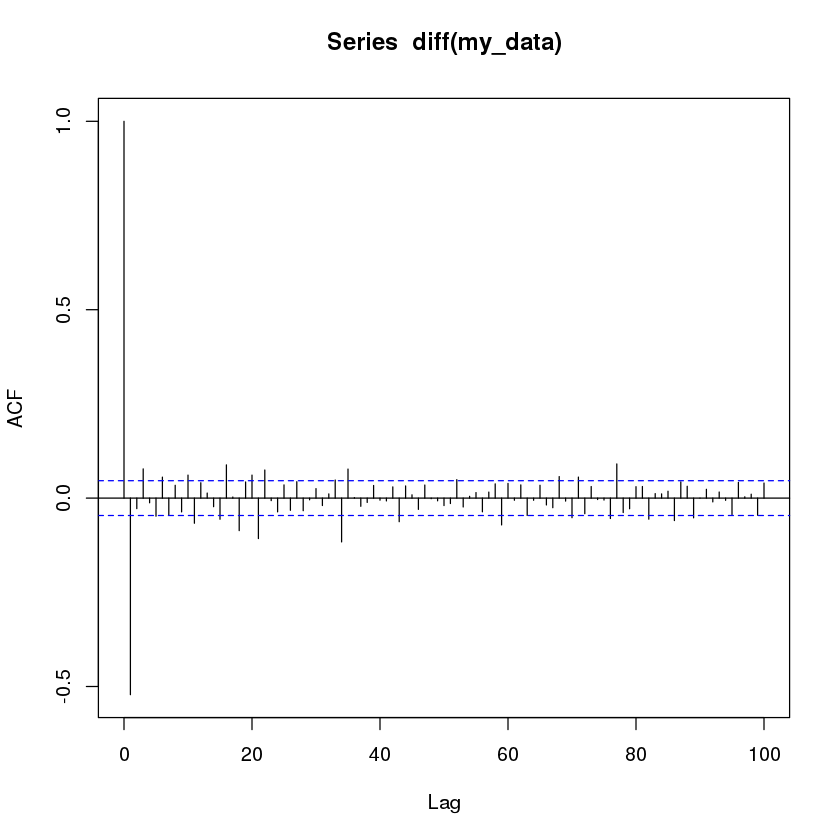

In [114]:
my_data_acf= acf(diff(my_data),100)

In [115]:
spfinal.aic <- Inf
 spfinal.order <- c(0,0,0)
 for (p in 1:4) for (d in 0:1) for (q in 1:3) {
   spcurrent.aic <- AIC(arima(diff(my_data), order=c(p, d, q)))
   if (spcurrent.aic < spfinal.aic) {
     spfinal.aic <- spcurrent.aic
     spfinal.order <- c(p, d, q)
     spfinal.arima <- arima(diff(my_data), order=spfinal.order)
   }
 }
     print(spfinal.aic) 
     print(spfinal.order)

[1] -10142.73
[1] 3 0 3


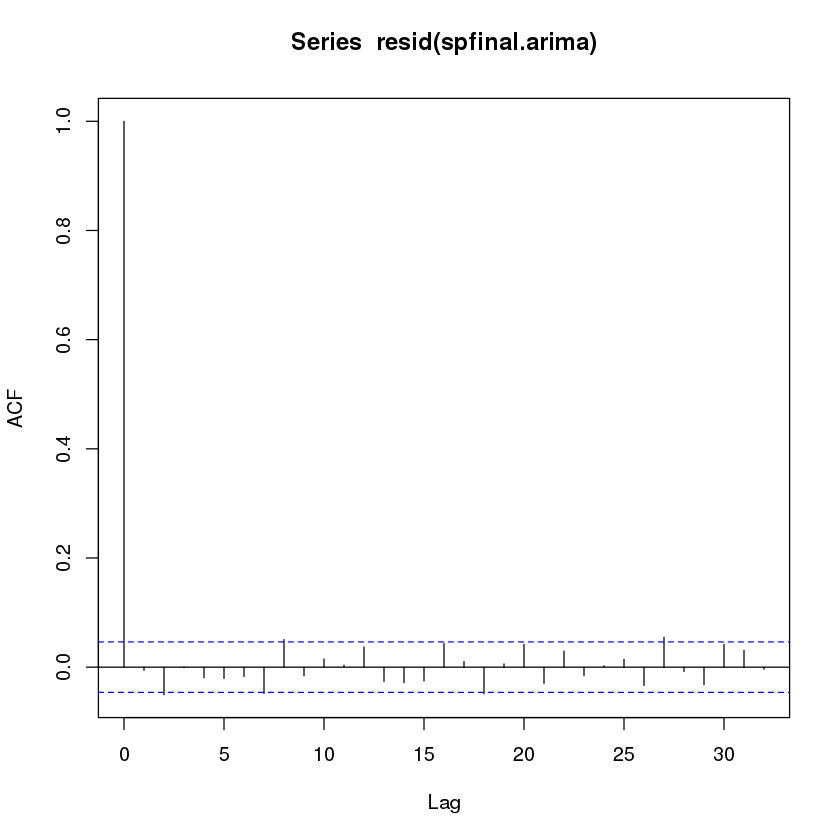

In [116]:
spfinal.arima <- arima(diff(my_data), order=spfinal.order)
acf(resid(spfinal.arima), na.action=na.omit)

In [117]:
Box.test(resid(spfinal.arima), lag=15, type="Ljung-Box")


	Box-Ljung test

data:  resid(spfinal.arima)
X-squared = 22.665, df = 15, p-value = 0.09151


It is clearly that the p value although is small, but it is still larger than 0.05, it means that the model is more or less a good fit. However, be careful, it is well-known that the financial time series shows <b> conditional heteroskedastic behavior </b> (that's why ARMA, ARIMA.. are not good enough for making the prediction of the financial time series. 
In order to test the conditional heteroskedastic behaviour, we need to square the residuals and plot the corresponding correlogram. (These is written by any time series book) 

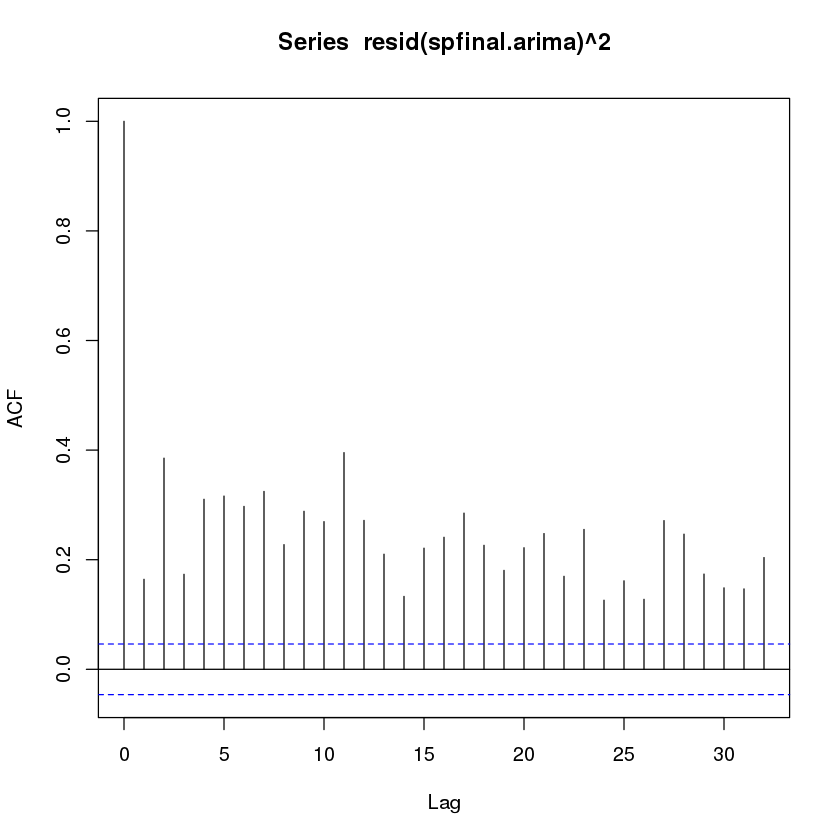

In [118]:
acf(resid(spfinal.arima)^2)

<b>We can see clear evidence of serial correlation in the squared residuals. From above plot, we conclude that conditional heteroskedastic behaviour is present in the diff series of the SP500 index. </b>


In [119]:
step=30
predict_arrays <-predict(arima(diff(my_data), order=spfinal.order), n.ahead = 30)

According to the <a href="https://stat.ethz.ch/R-manual/R-devel/library/stats/html/predict.arima.html"> manual </a>,  the first array 'pred' is from the prediction value; the second array 'se' is the standard error. 

In [120]:
print(predict_arrays)

$pred
Time Series:
Start = 1802 
End = 1831 
Frequency = 1 
 [1] -5.732796e-04  1.259351e-03  8.217539e-04 -1.948906e-03  6.231379e-04
 [6]  1.459087e-03 -1.671179e-03 -2.157635e-04  1.797634e-03 -1.094271e-03
[11] -9.673756e-04  1.777997e-03 -3.424884e-04 -1.494677e-03  1.423689e-03
[16]  4.325100e-04 -1.710466e-03  8.201214e-04  1.083062e-03 -1.591198e-03
[21]  9.506701e-05  1.493170e-03 -1.177913e-03 -6.078153e-04  1.598658e-03
[26] -5.649151e-04 -1.156992e-03  1.396434e-03  1.209782e-04 -1.457229e-03

$se
Time Series:
Start = 1802 
End = 1831 
Frequency = 1 
 [1] 0.01436773 0.02147327 0.02152858 0.02153200 0.02153545 0.02153675
 [7] 0.02154412 0.02154487 0.02154902 0.02155443 0.02155453 0.02156081
[13] 0.02156312 0.02156495 0.02157108 0.02157131 0.02157565 0.02157957
[19] 0.02157994 0.02158562 0.02158692 0.02158920 0.02159410 0.02159412
[25] 0.02159845 0.02160113 0.02160185 0.02160680 0.02160742 0.02161002



From above, it is shown the predicted 30 steps further from time sereis point 3801 to 3830 (because we start from point 2000 to 3800 (totally 1801 points) as for model fitting. Be careful that the error bars are big. 

In [121]:
print(my_data_orig[3801:3813])

 [1] -0.000845  0.001213  0.000282  0.005728  0.003488  0.004513  0.001592
 [8]  0.000091  0.005530 -0.001764  0.005191 -0.003814 -0.002478


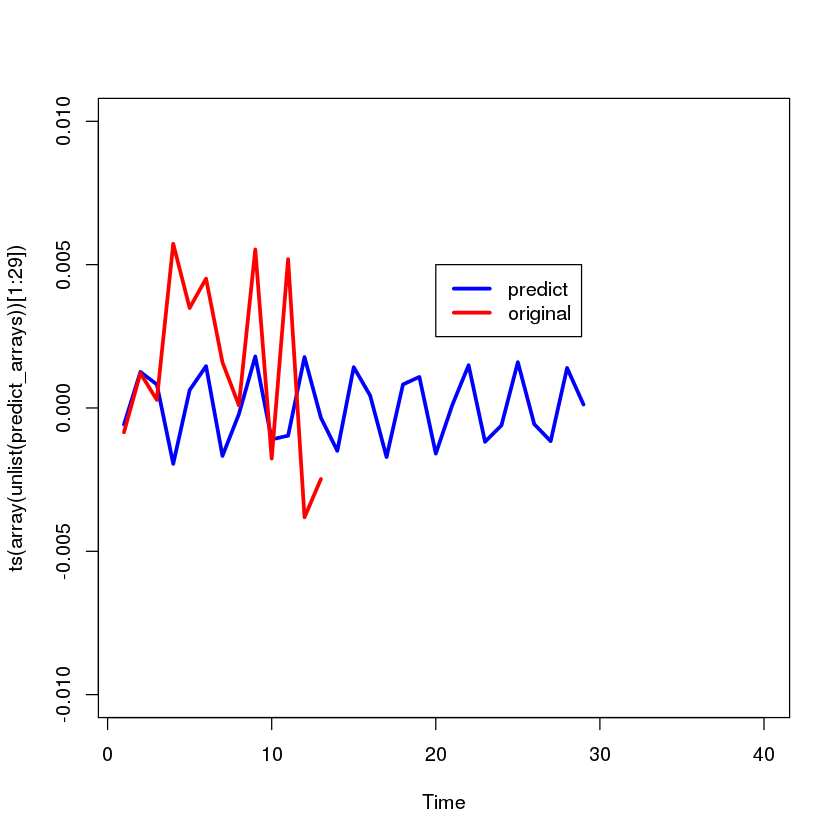

In [122]:
#plot(ts(my_data_orig[3801:3813]))
plot(ts(array(unlist(predict_arrays))[1:29]),  xlim=c(1, 40), ylim=c(-0.01, 0.01),  col="blue", cex=0.8, lwd=3)
lines(ts(my_data_orig[3801:3813]), col="red", lwd=3)
legend(20,0.005, c('predict', 'original'), lwd=c(3,3),col=c('blue','red'))

<b> Conclusion </b> <br>
Since the SP500 time series show obvious <b> conditional heteroskedastic behavior </b>, the ARIMA, ARMA models are not sufficient to predict the results. More advanced models, like ARCH, GARCH models should be used. For that, we need the other R libraries, like <b> tseries, rugarch </b>. I have never used these packages. But I hope I will be able to dig further about these packages while at startup.ml. I believe there are experts there whom I can discuss with and learn from. I did this analysis based on my understanding of time series and I will fully focus on this study while at fellowship.  
 